In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os

temp_df = pd.read_csv(os.path.join('DatensatzLB259.csv'))
temp_df = temp_df.dropna()

features= ['date', 'Day']
target = ['min_temp']
           
X = temp_df[features]
Y = temp_df[target]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
   X, Y, test_size = 0.3, random_state = 42 
)
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(random_state=42)
model.fit(X, Y)
y_pred = model.predict(X_test)


print(y_pred[:10])

[ 7.8 17.2  0.   9.7  6.6 13.5  2.6  4.7  5.9  4.9]


# 4.1 

Bestimmen Sie, welche Felder Ihrer Daten für Ihr Modell besonders aussagekräftig sind.

<Axes: >

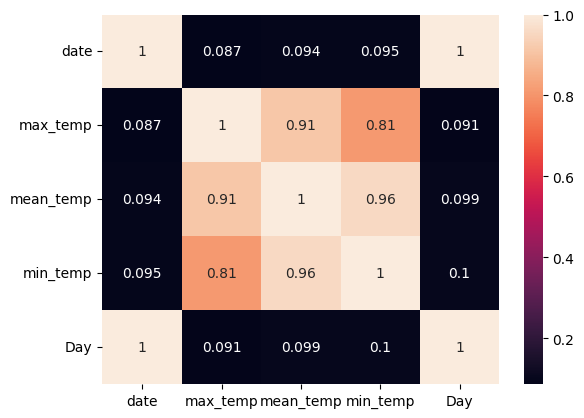

In [34]:
import seaborn as sns



corr_matrix = temp_df.corr()
sns.heatmap(corr_matrix, annot=True)

Der Wert mean_temp ist am wichtigsten, da er den Höchsten wert bei min_temp hat. 

# 4.2 

Wählen Sie eine geeignete Messmetrik für Ihr Modell und berechnen 
Sie sie.

Ich habe den Wert MSE genommen, da er Laut dem Internet für dieses Modell sehr gut funktionieren soll.

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.0


# 4.3 

Wählen Sie geeignete Bedingungen und erstellen Sie eine 
Wahrheitsmatrix für Ihr Modell. Berechnen Sie darüber hinaus Sensitivität 
und Spezifizität.

In [36]:
from sklearn.metrics import confusion_matrix
import numpy as np



threshold = 0.5 

y_pred_binary = np.where(y_pred >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)


tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()


conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], 
                              index=['True Negative', 'True Positive'])
print(conf_matrix_df)




sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)



print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)


               Predicted Negative  Predicted Positive
True Negative                 479                   0
True Positive                   0                4113
Sensitivity:  1.0
Specificity:  1.0


# 4.4

Mein Modell funktioniert glaube ich nicht so gut, da obwohl der MSE 0.0, was bedeuten würde, dass das Modell immer genau ist. Dies gibt allerdings keinen Sinn, da die ersten 10 Vorhersagen alle Falsch waren, deswegen ist dies nicht möglich. Allerdings schliesst auch die Sensitivity und Specifity und die True/false positives und negatives daruaf. Dies sollte ein Fehler im Code sein. Eine Möglichkeit, weswegen die Daten so ungenau sind:

-Falsche Auswahl von Daten.
-Unnötige Daten die nicht gebraucht werden.
